In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plot
import seaborn as sns

import riskfolio as rp
from openbb_terminal.sdk import openbb
from openbb_terminal.sdk import TerminalStyle
theme = TerminalStyle("light", "light", "light")

from datetime import date
from datetime import timedelta

Forecasting Toolkit is disabled. To use the Forecasting features please install the toolkit following the instructions here: https://docs.openbb.co/sdk/quickstart/installation/

Portfolio Optimization Toolkit is disabled. To use the Optimization features please install the toolkit following the instructions here: https://docs.openbb.co/sdk/quickstart/installation/

In [ ]:
# Setting-up the dataframes
my_df = Path('../Resources/portfolio_eli.csv')
omar_df = Path('../Resources/portfolio_omar.csv')
eamonn_df = Path('../Resources/portfolio_eamonn.csv')
mike_df = Path('../Resources/portfolio_mike.csv')

# Clean the data
my_portfolio = pd.read_csv(my_df, index_col='Stock')
my_portfolio['Weight'] = my_portfolio['Weight'].str.replace('%','').astype('float') / 100

omar_portfolio = pd.read_csv(omar_df, index_col='Stock')
omar_portfolio['Weight'] = omar_portfolio['Weight'].str.replace('%','').astype('float') / 100

eamonn_portfolio = pd.read_csv(eamonn_df, index_col='Stock')
eamonn_portfolio['PortFolio Weight'] = eamonn_portfolio['PortFolio Weight'].str.replace('%','').astype('float') / 100

mike_portfolio = pd.read_csv(mike_df)
mike_portfolio['WEIGHT'] = mike_portfolio['WEIGHT'].astype('float')

# Adding the data into lists
my_stock_tickers = my_portfolio['Ticker'].tolist()
my_stock_weights = my_portfolio['Weight'].tolist()

omar_stock_tickers = omar_portfolio['Ticker'].tolist()
omar_stock_weights = omar_portfolio['Weight'].tolist()

eamonn_stock_tickers = eamonn_portfolio['Ticker'].tolist()
eamonn_stock_weights = eamonn_portfolio['PortFolio Weight'].tolist()

mike_stock_tickers = mike_portfolio['STOCK'].tolist()
mike_stock_weights = mike_portfolio['WEIGHT'].tolist()

In [ ]:
# Setup for end_date, calling on last full day.
today = date.today()

# Getting the initial date ranges for review
startdate = date(2018,1,1)
end_date = today - timedelta(days = 1)
print(end_date)
print(f'There are {len(my_stock_tickers)} individual stocks in your portfolio')

2023-02-22
There are 6 individual stocks in your portfolio


In [ ]:
my_data = openbb.economy.index(my_stock_tickers, start_date=startdate, end_date=end_date)

In [ ]:
omar_data = openbb.economy.index(omar_stock_tickers, start_date=startdate, end_date=end_date)

In [ ]:
eamonn_data = openbb.economy.index(eamonn_stock_tickers, start_date=startdate, end_date=end_date)

In [ ]:
mike_data = openbb.economy.index(mike_stock_tickers, start_date=startdate, end_date=end_date)

In [ ]:
# Getting Daily Returns for All Portfolios
my_daily_returns = my_data.pct_change()
my_daily_returns = my_daily_returns.dropna()
my_portfolio_returns = my_daily_returns.dot(my_stock_weights)

omar_stock_daily_returns = omar_data.pct_change()
omar_stock_daily_returns = omar_stock_daily_returns.dropna()
omar_portfolio_returns = omar_stock_daily_returns.dot(omar_stock_weights)

eamonn_stock_daily_returns = eamonn_data.pct_change()
eamonn_stock_daily_returns = eamonn_stock_daily_returns.dropna()
eamonn_portfolio_returns = eamonn_stock_daily_returns.dot(eamonn_stock_weights)

mike_stock_daily_returns = mike_data.pct_change()
mike_stock_daily_returns = mike_stock_daily_returns.dropna()
mike_portfolio_returns = mike_stock_daily_returns.dot(mike_stock_weights)

pandas.core.series.Series

In [ ]:
sap_ticker = ['SPY']

sap_data = openbb.economy.index(sap_ticker, start_date=startdate, end_date=end_date)
sap_daily_returns = sap_data.pct_change()
sap_daily_returns = sap_daily_returns.dropna()
sap_daily_returns

,SPY
Date,
2018-01-03,0.006325
2018-01-04,0.004215
2018-01-05,0.006664
2018-01-08,0.001829
2018-01-09,0.002264
...,...
2023-02-14,-0.000460
2023-02-15,0.003247
2023-02-16,-0.013769


In [ ]:
combined_df = pd.concat([my_portfolio_returns, omar_portfolio_returns, eamonn_portfolio_returns, mike_portfolio_returns, sap_daily_returns], axis='columns', join='inner')
combined_df.rename(columns={0:'My Portfolio Returns',1:'Omars Returns',2:'Eamonns Returns',3:'Mikes Returns'}, inplace=True)
combined_df

,My Portfolio Returns,Omars Returns,Eamonns Returns,Mikes Returns,SPY
Date,,,,,
2018-01-03,0.006336,0.010049,-0.001315,0.011554,0.006325
2018-01-04,0.003663,0.006309,0.004000,0.004708,0.004215
2018-01-05,0.008856,0.009868,0.004696,0.005382,0.006664
2018-01-08,0.002163,0.007088,0.000708,0.000502,0.001829
2018-01-09,0.000743,0.001176,0.000137,0.000008,0.002264
...,...,...,...,...,...
2023-02-14,0.001308,0.004011,-0.003973,0.004668,-0.000460
2023-02-15,0.006876,0.002941,0.003429,0.002723,0.003247
2023-02-16,-0.014223,-0.017998,-0.009727,-0.016415,-0.013769


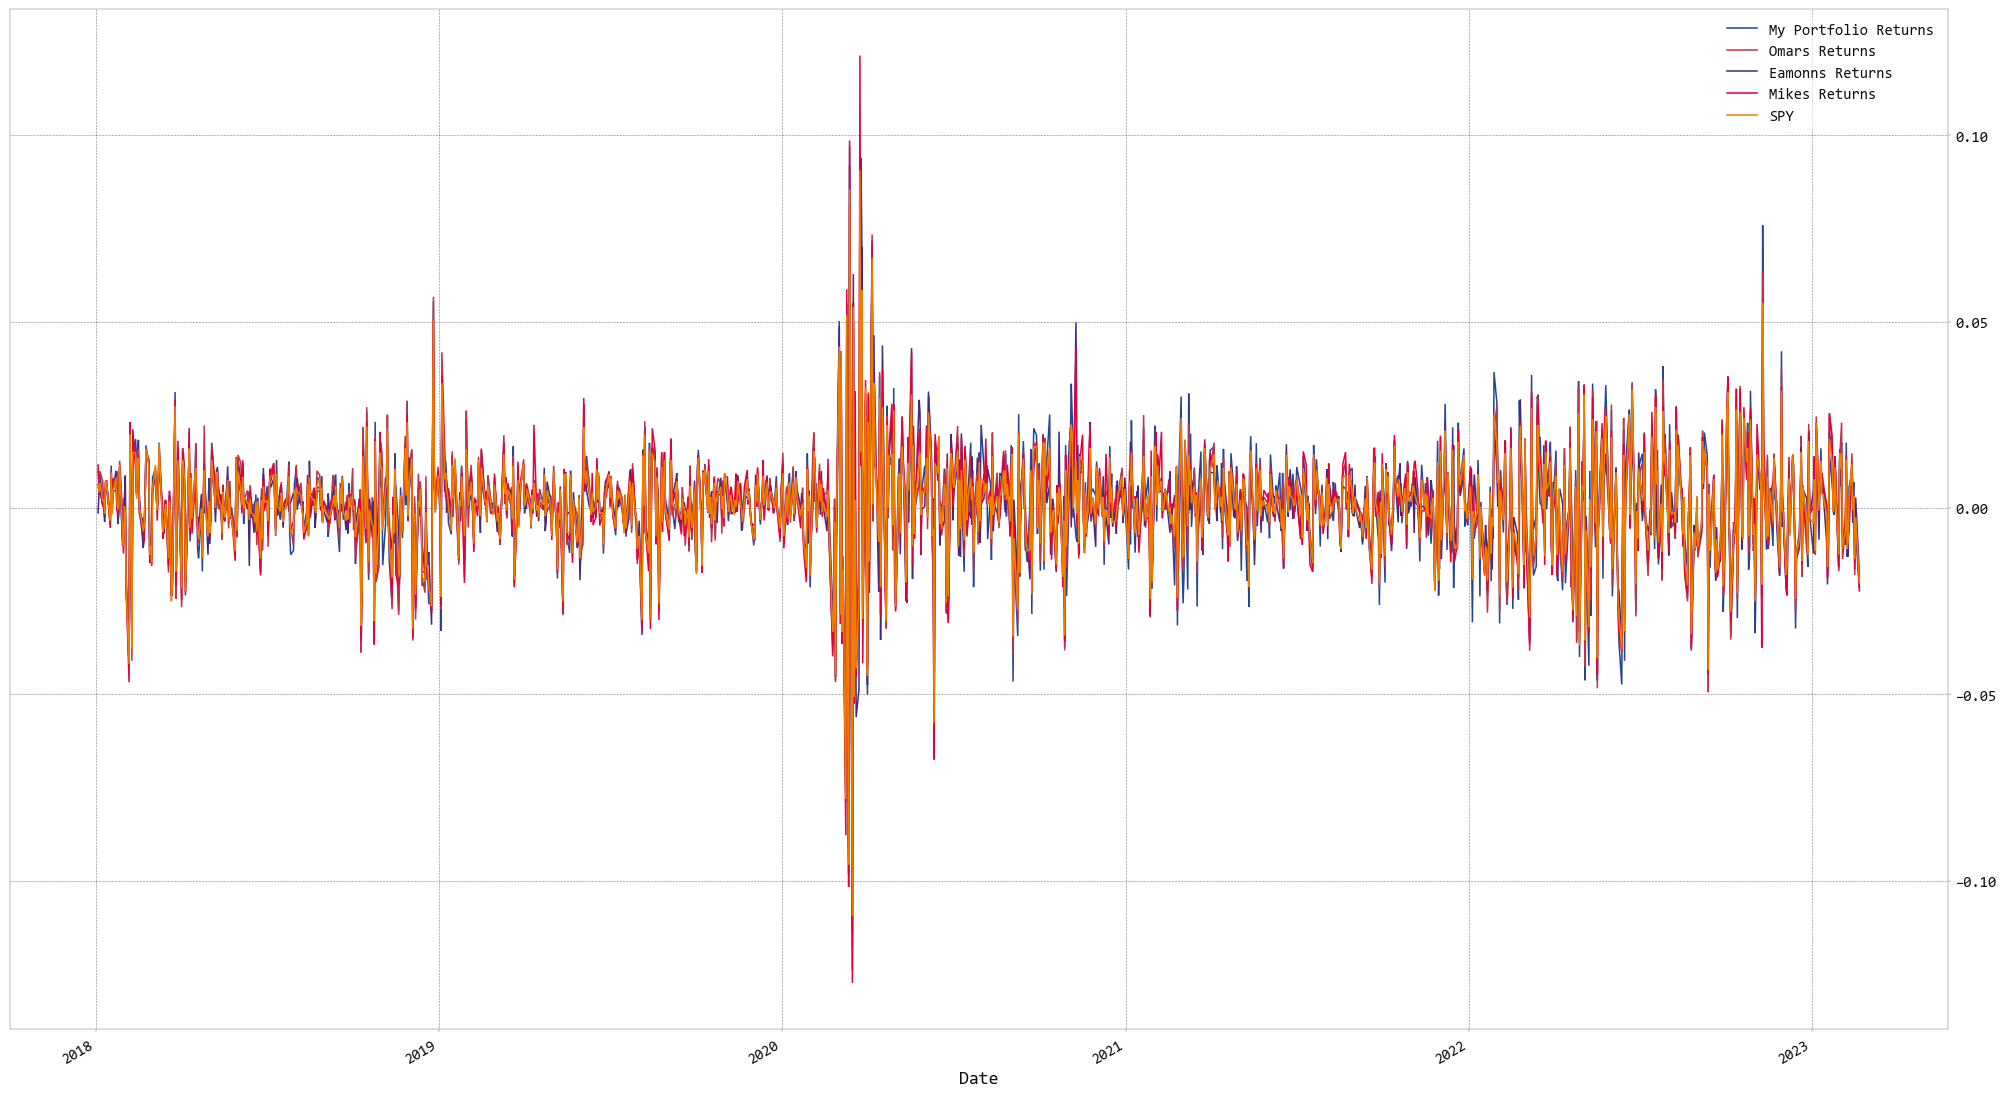

In [ ]:
combined_df.plot(figsize=(25,15)).autoscale()

In [ ]:
portfolio_std = pd.DataFrame(combined_df.std())
portfolio_std = portfolio_std.rename(columns= {0:'Standard Deviation'})
portfolio_std

,Standard Deviation
My Portfolio Returns,0.015563
Omars Returns,0.014492
Eamonns Returns,0.013090
Mikes Returns,0.014975
SPY,0.013505


In [ ]:
# Lets Test Our Portfolios
initial_investment = 10000

<Axes: title={'left': 'Eli'}, xlabel='Date'>

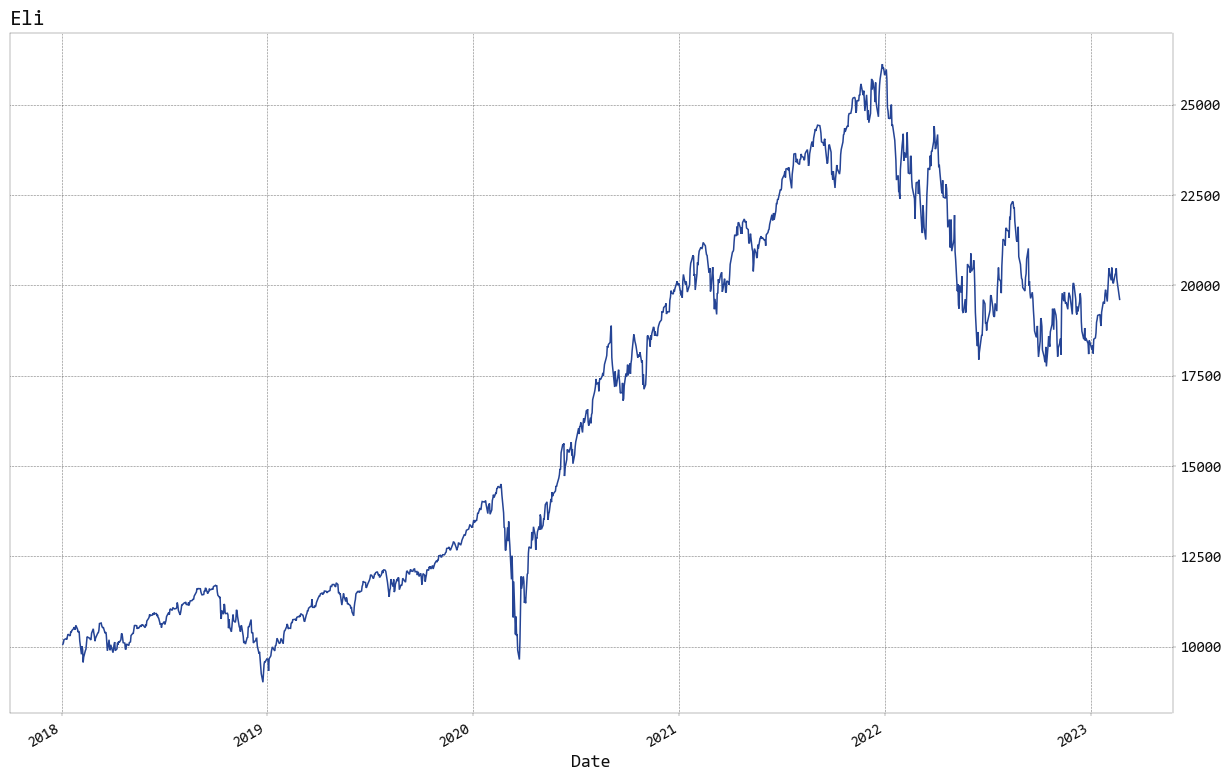

In [ ]:
cummulative_returns = (1 + my_portfolio_returns).cumprod()
(initial_investment * cummulative_returns).plot(
    title = "Eli",
    figsize = (15, 10)
)

<Axes: title={'left': 'Omar'}, xlabel='Date'>

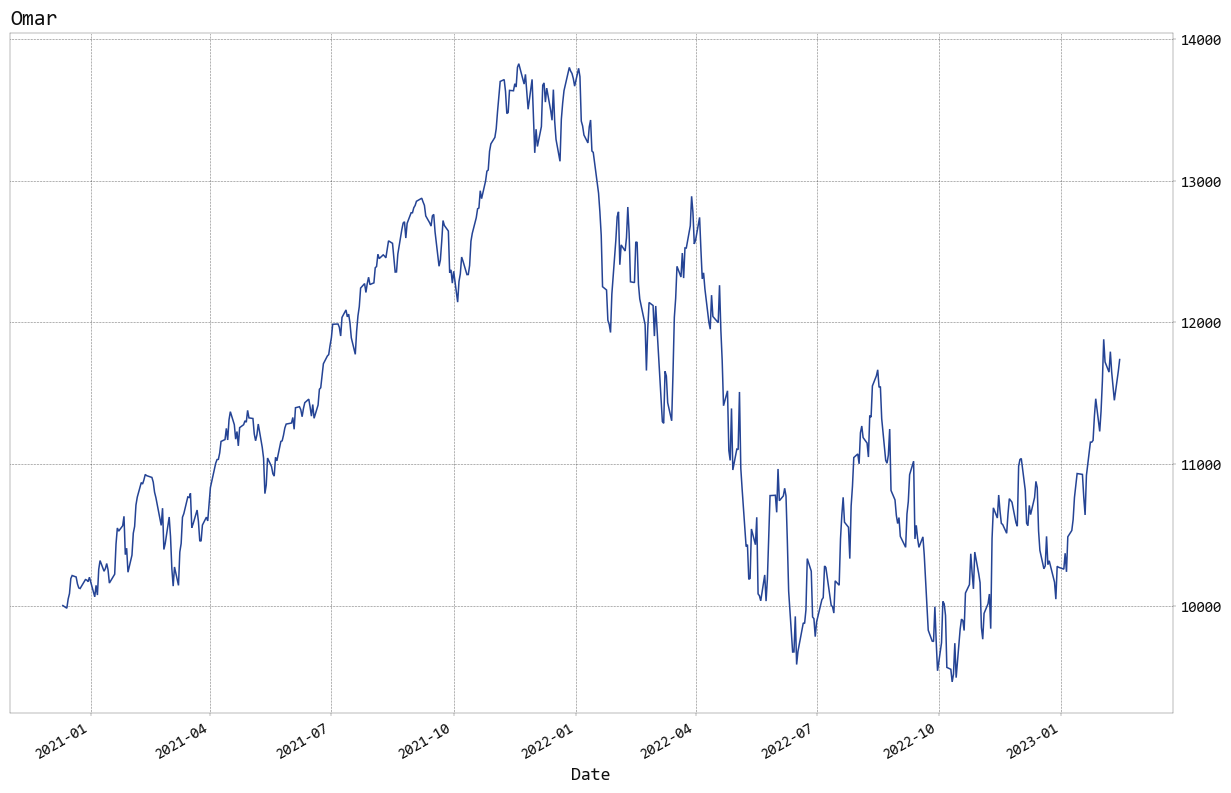

In [39]:
cummulative_returns = (1 + omar_portfolio_returns).cumprod()
(initial_investment * cummulative_returns).plot(
    title = "Omar",
    figsize = (15, 10)
)

<Axes: title={'left': 'Eamonn'}, xlabel='Date'>

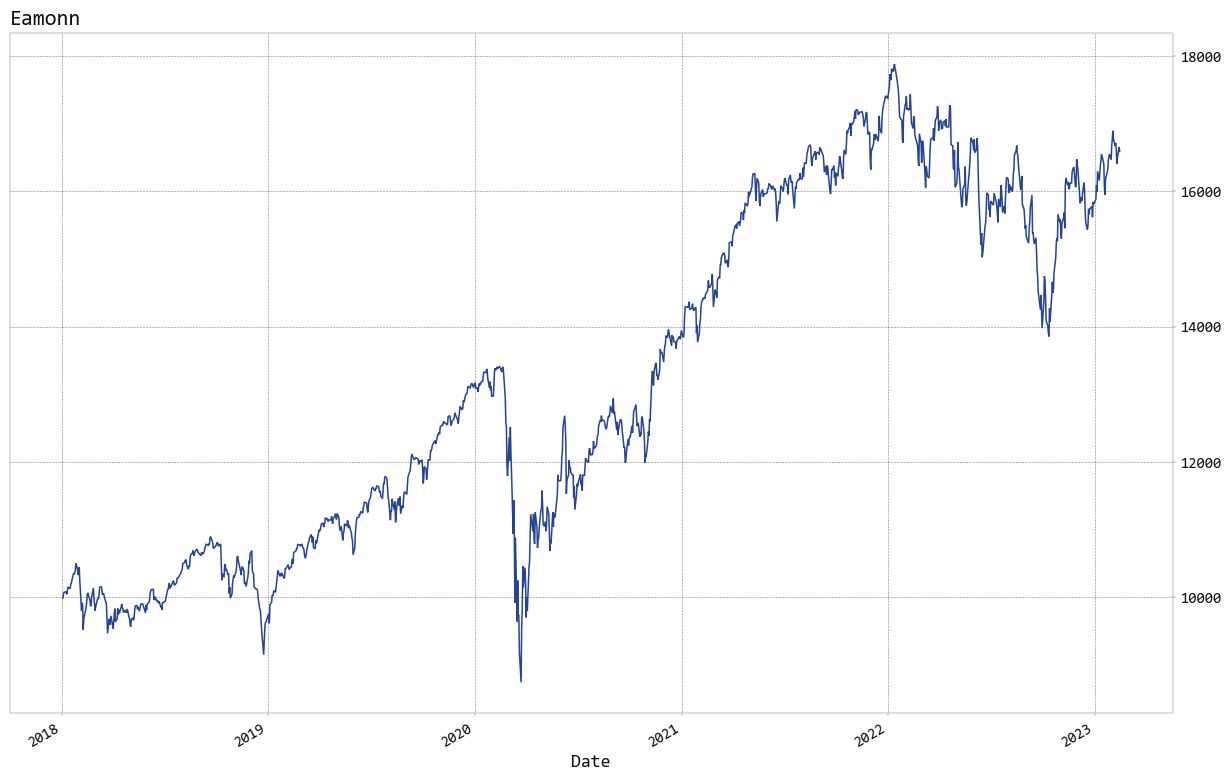

In [40]:
cummulative_returns = (1 + eamonn_portfolio_returns).cumprod()
(initial_investment * cummulative_returns).plot(
    title = "Eamonn",
    figsize = (15, 10)
)

<Axes: title={'left': 'Mike'}, xlabel='Date'>

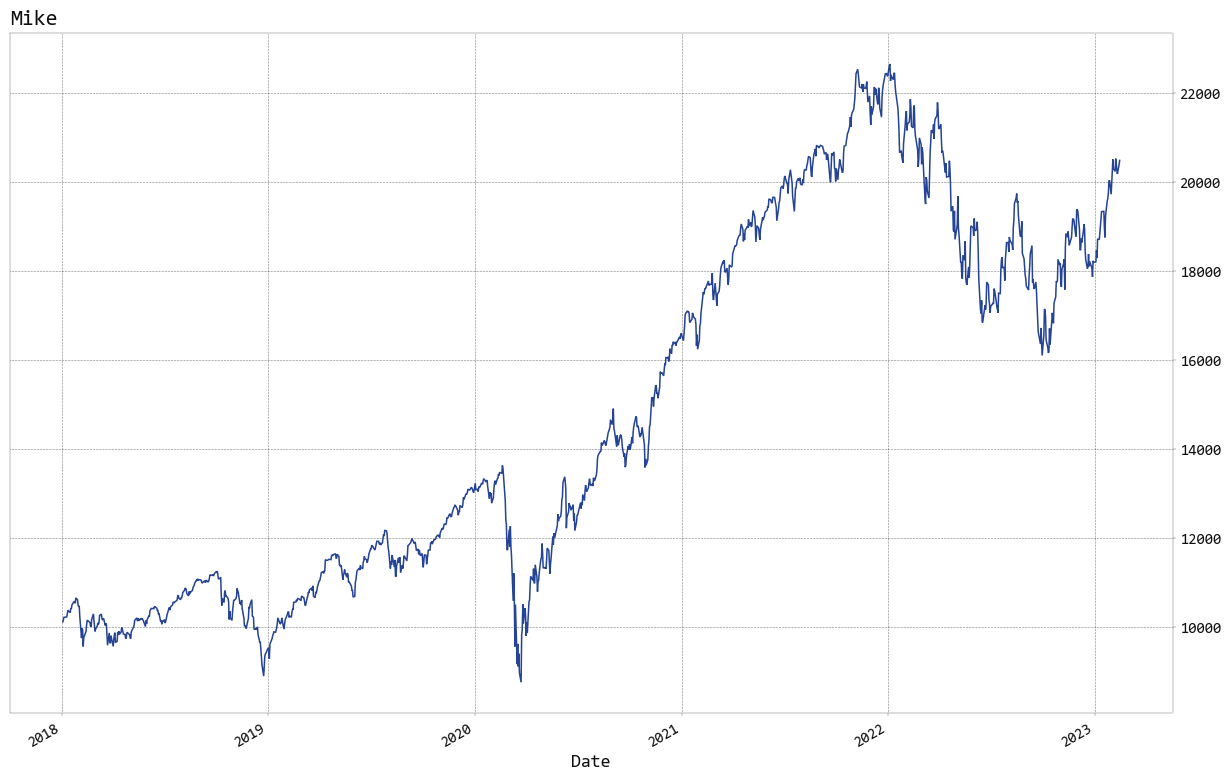

In [41]:
cummulative_returns = (1 + mike_portfolio_returns).cumprod()
(initial_investment * cummulative_returns).plot(
    title = "Mike",
    figsize = (15, 10)
)

In [22]:
stocks = openbb.stocks.disc.asc()
stocks.head()

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,SKLZ,Skillz Inc.,0.8468,0.0582,+7.38%,3.327M,9.797M,355.913M,
1,TLRY,"Tilray Brands, Inc.",3.0542,0.0842,+2.84%,6.646M,19.273M,1.88B,7.27
2,UP,Wheels Up Experience Inc.,1.1500,0.0200,+1.77%,453656,1.576M,284.628M,
3,SDC,"SmileDirectClub, Inc.",0.6121,0.0221,+3.75%,227459,2.794M,237.562M,
4,OPEN,Opendoor Technologies Inc.,2.3400,0.1800,+8.33%,12.029M,25.44M,1.484B,
